# Loan prediction

Data is adapted from https://www.kaggle.com/wordsforthewise/lending-club. This project uses a DNN but focuses heavily on cleaning the data. To provide some context, the input of this project is historical data on loans given out, in particular including information on whether the borrower defaulted. Our goal is to predict whether a given borrower will pay back their loan.

In [20]:
import pandas as pd

data_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [21]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

feat_info('mort_acc')

Number of mortgage accounts.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/lending_club_loan_two.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploring data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

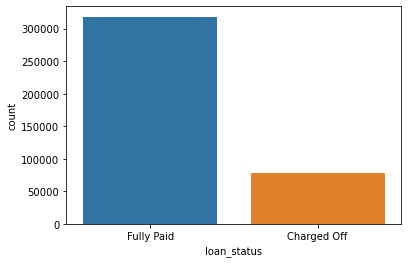

In [24]:
sns.countplot(x='loan_status', data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

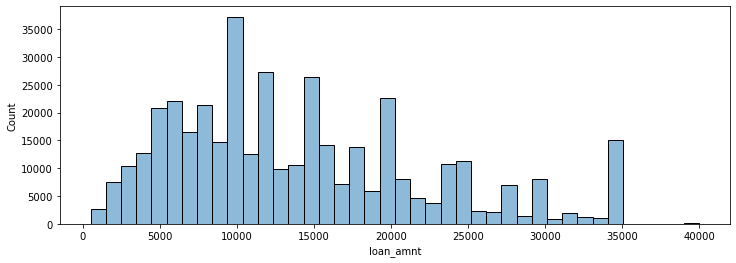

In [25]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='loan_amnt', bins=40, alpha=0.5, )

<AxesSubplot:>

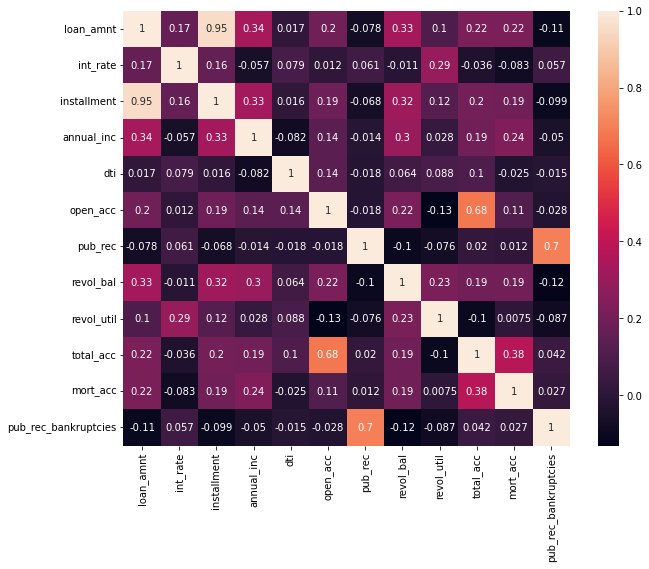

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

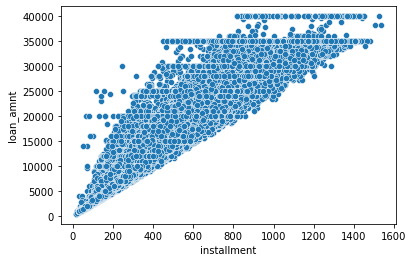

In [27]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

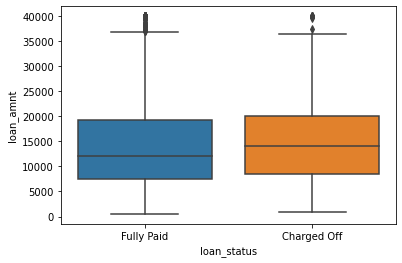

In [28]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [29]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [30]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [31]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

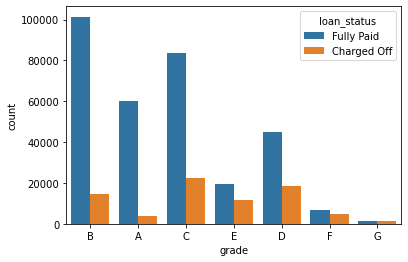

In [32]:
sns.countplot(x='grade', hue='loan_status', data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

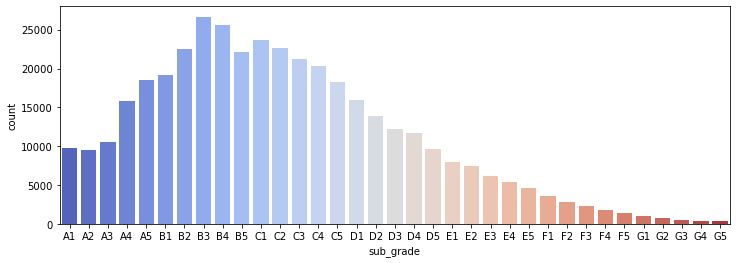

In [33]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

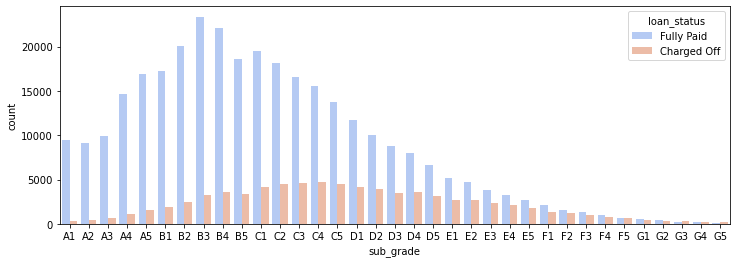

In [34]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, hue='loan_status', palette='coolwarm')

In [35]:
dffg = df[(df['grade']=='F') | (df['grade']=='G')]
dffg.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.0,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.0,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.0,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

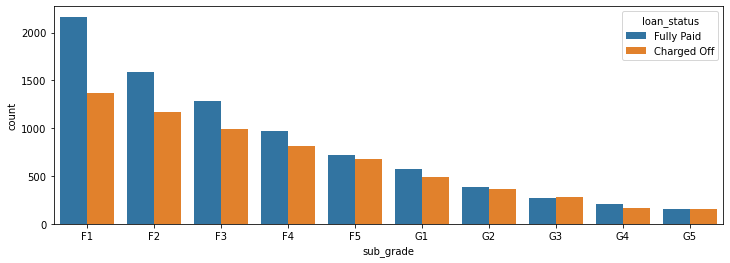

In [36]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(dffg['sub_grade'].unique())
sns.countplot(x='sub_grade',
              data=dffg,
              order=subgrade_order,
              hue='loan_status')

In [37]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [38]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

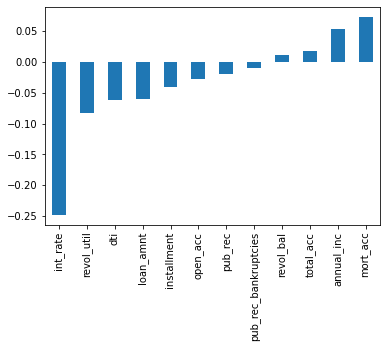

In [39]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

## Preprocessing

In [40]:
len(df)

396030

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [43]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [44]:
df = df.drop('emp_title', axis=1)

In [45]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

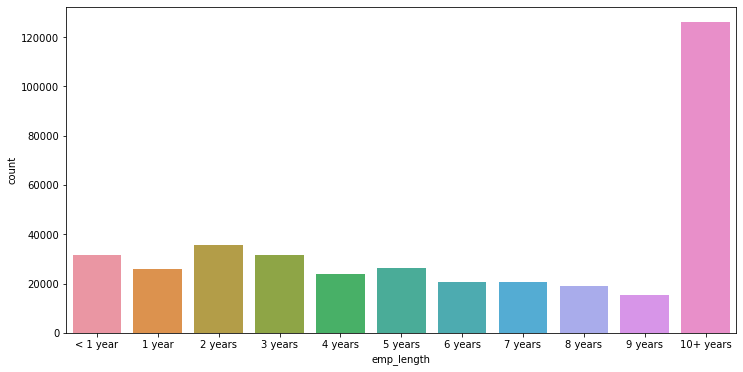

In [46]:
emp_length_order = ['< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years']

plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

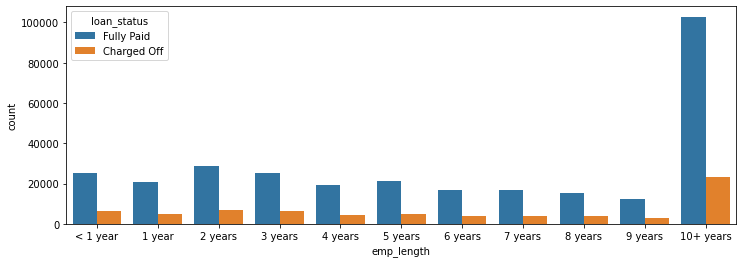

In [47]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')

In [48]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [49]:
temp = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status'] / df.groupby('emp_length').count()['loan_status']

<AxesSubplot:xlabel='emp_length'>

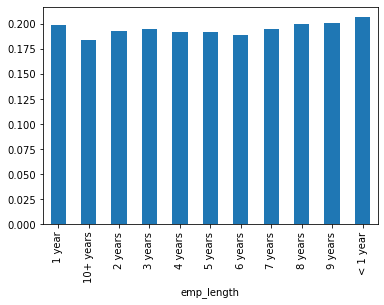

In [50]:
temp.plot(kind='bar')

In [51]:
df = df.drop('emp_length', axis=1)
df = df.drop('title', axis=1)
df = df.drop('grade', axis=1)
df = df.drop('loan_status', axis=1)

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [53]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [54]:
df.corr()['mort_acc'].sort_values(ascending=False)[1:]

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [55]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [56]:
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

df['mort_acc'] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [57]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [58]:
df = df.dropna()
df.select_dtypes(['object']).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [59]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [60]:
df['term'] = df['term'].apply(lambda x : int(x[:3]))

In [61]:
dummy = pd.get_dummies(data=df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummy], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [62]:
for x in ['verification_status', 
          'application_type',
          'initial_list_status',
          'purpose']:

  dummy = pd.get_dummies(data=df[x], drop_first=True)
  df = pd.concat([df.drop(x, axis=1), dummy], axis=1)

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'],
      dtype='object')

In [63]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [64]:
df['home_ownership'] = df['home_ownership'].replace(
  to_replace=['NONE', 'ANY'], value='OTHER')
dummy = pd.get_dummies(data=df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummy], axis=1)

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT',
       'w', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [65]:
df['zip_code'] = df['address'].apply(lambda x : x.split()[-1])
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [66]:
dummy = pd.get_dummies(data=df['zip_code'], drop_first=True)
df = pd.concat([df.drop(['address', 'zip_code'], axis=1), dummy], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
       'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052',
       '70466', '86630', '93700'],
      dtype='object')

In [67]:
df = df.drop('issue_d', axis=1)

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : int(x[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [68]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## Creating model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
X_train.shape

(316175, 78)

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [72]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [73]:
model.fit(X_train, 
          y_train, 
          epochs=25, 
          batch_size=256, 
          validation_data=(X_test, y_test))

model.save('final_proj_model.h5')

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.3045 - val_loss: 0.2658
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2658 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2619
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2618 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2609 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2612
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2599 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2597 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2594 - val_loss: 0.2611
Epoch 10/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.258

### Evaluation

<AxesSubplot:>

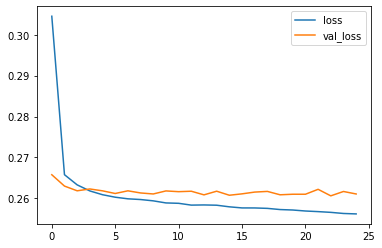

In [74]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

pred = np.rint(model.predict(X_test)).astype(int)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 6858  8800]
 [  101 63285]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [76]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [77]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))
np.rint(model.predict(new_customer)).astype(int)

array([[1]])

In [78]:
df.iloc[random_ind]['loan_repaid']

1.0